<a href="https://colab.research.google.com/github/yonikremer/final_project/blob/master/profiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set-Up please ignore

In [1]:
%%bash
rm -rf ./final_project
git clone https://github.com/yonikremer/final_project.git
pip install --quiet --requirement /content/final_project/evaluation/evaluation_requirements.txt
pip install --quiet --requirement /content/final_project/project_requirements.txt

Cloning into 'final_project'...


In [2]:
import sys
sys.path.append('/content/final_project');

# Enter A Prompt

In [3]:
from final_project.sampling_generator import GroupedSamplingPipeLine
g = GroupedSamplingPipeLine(
        model_name="facebook/opt-125m",
        group_size=8,
        temp=1.0,
        top_k=None,
        top_p=1.0,
        end_of_sentence_stop=True,
        answer_length_multiplier=4,
    )
example_prompt = "What do you do when your firmly held beliefs turn out not to be true? When Casey Gerald's religion failed him, he searched for something new to believe in -- in business, in government, in philanthropy -- but found only false saviors. In this moving talk, Gerald urges us all to question our beliefs and embrace uncertainty."  # @param {type:"string"}

Downloading:   0%|          | 0.00/685 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/651 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/441 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/251M [00:00<?, ?B/s]

# Create a graph of run time in seconds as a function of the group size

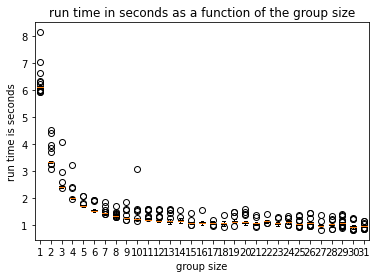

In [4]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
max_group_size = 16  # @param {type:"slider", min:1, max:128, step:1}
num_experiments = 50  # @param {type:"slider", min:1, max:64, step:1}
run_times_df = pd.DataFrame(columns=range(1, max_group_size), dtype=pd.Float32Dtype)
for curr_seed in range(num_experiments):
    g.default_seed = curr_seed
    curr_row = []
    for curr_group_size in range(1, max_group_size+1):
        g.group_size = curr_group_size
        start_time = datetime.now()
        g(example_prompt)
        curr_time_diff = (datetime.now() - start_time).total_seconds()
        curr_row.append(curr_time_diff)
    run_times_df[curr_seed] = curr_row

plt.boxplot(run_times_df)
plt.ylabel('run time is seconds')
plt.xlabel('group size')
plt.title('run time in seconds as a function of the group size')
plt.show()

# See where the computer spends that time

In [13]:
g.group_size

31


In [16]:
g.group_size = 1
%prun g(example_prompt)

for group size of 1, the algorithem spent 5.166 out of 6 seconds on calling the model and that is why the run time improvement is much more significant

In [14]:
g.group_size = 16
%prun g(example_prompt)

As you can see, of large group size the algorithm only spends 0.280 out of 0.992 seconds on the function get_prob_mat that calls the model so that is the reason the improvement in runtime of the algorithm is not significant